**Multiple Linear Regression project**

**Prediction of median value of owner-occupied homes in $1000s**

In [1]:
#Let's import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [11]:
# for warnings messages
import warnings
warnings.simplefilter(action='ignore', category=Warning)

**Understanding the dataset**

In [4]:
data=pd.read_excel(r"C:\Users\Lenovo\Desktop\Machine Learning\boston housing data.xlsx")

In [62]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
#Shape of the dataset

data.shape

(506, 14)

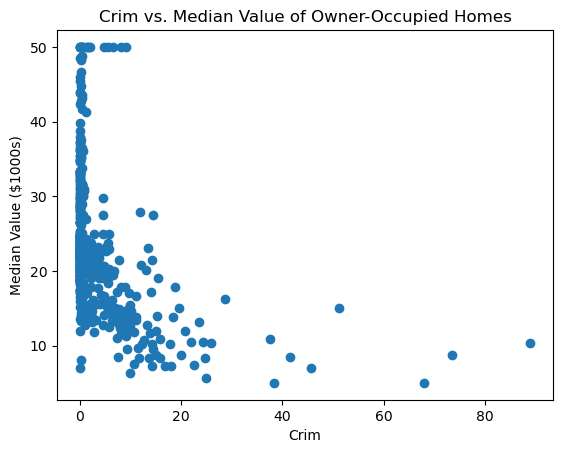

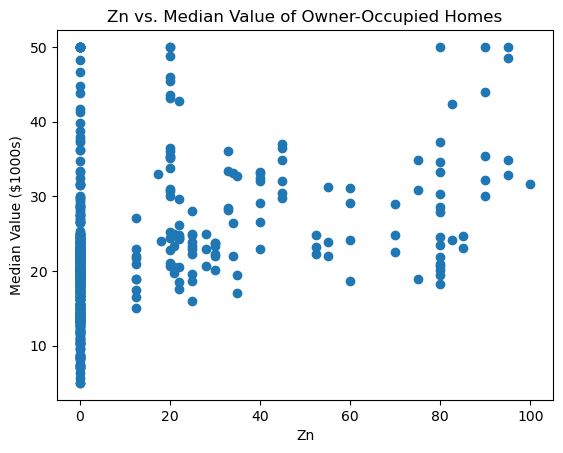

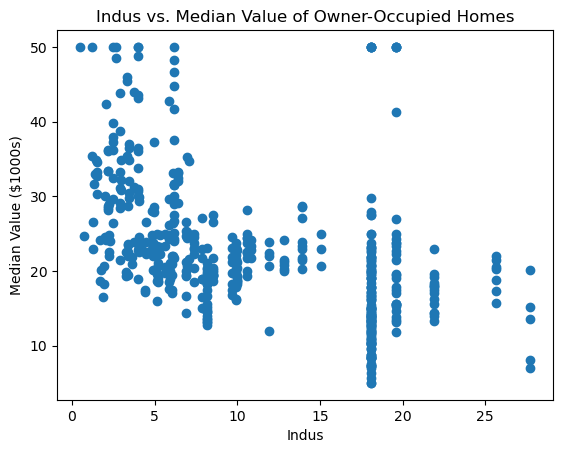

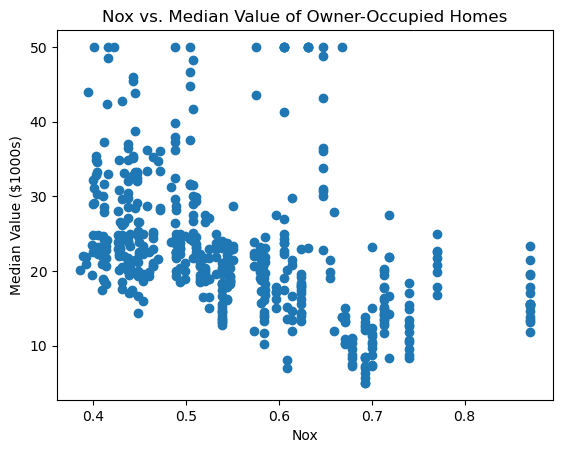

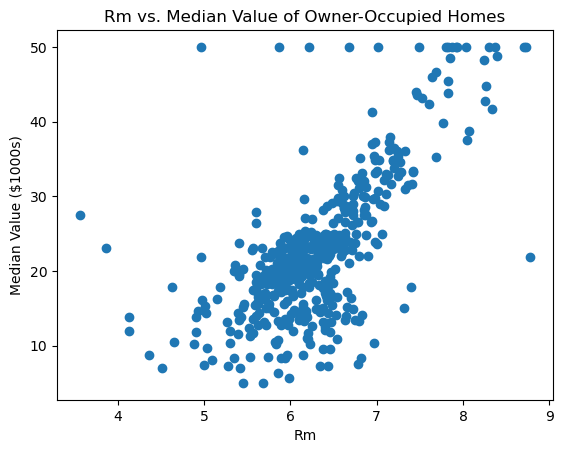

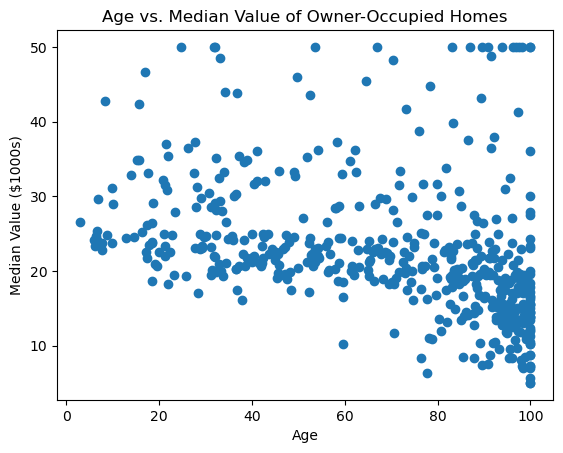

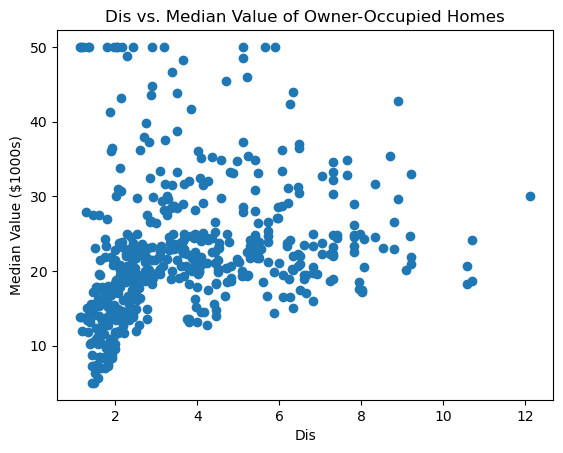

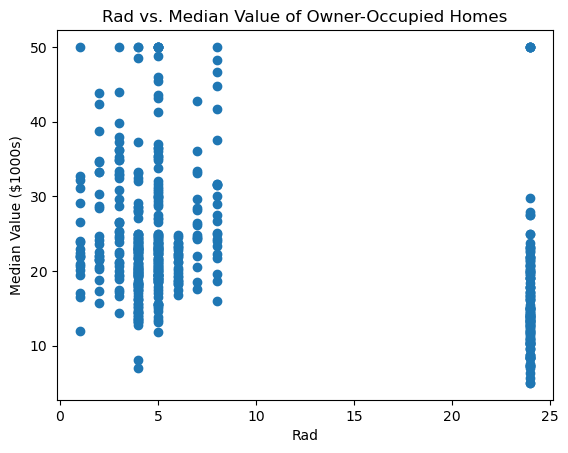

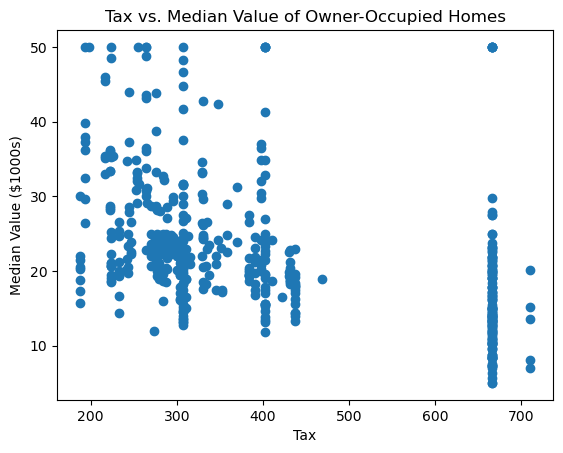

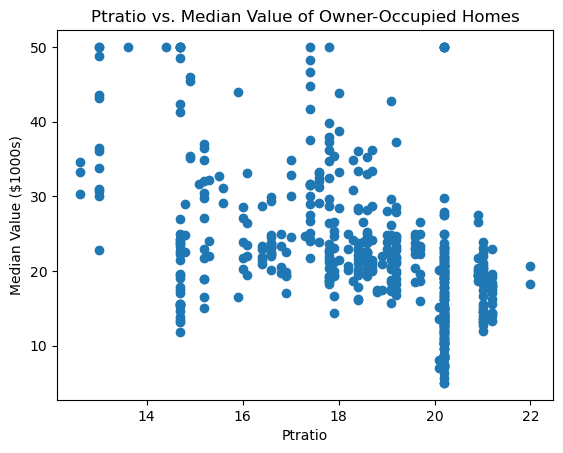

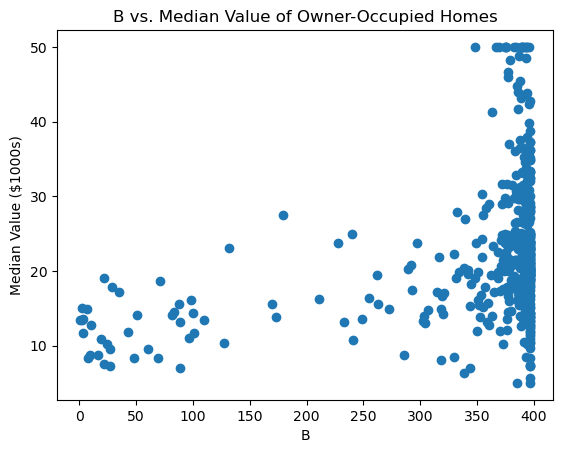

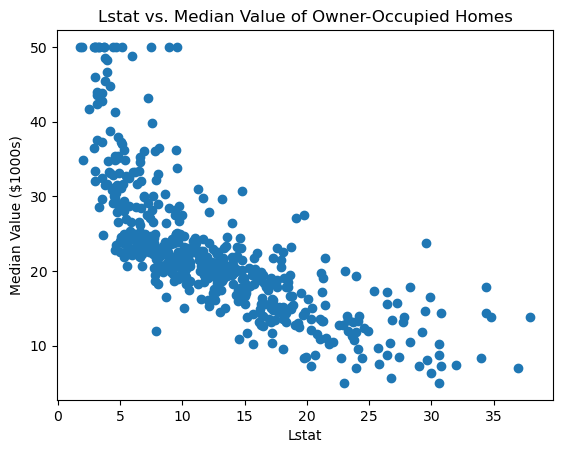

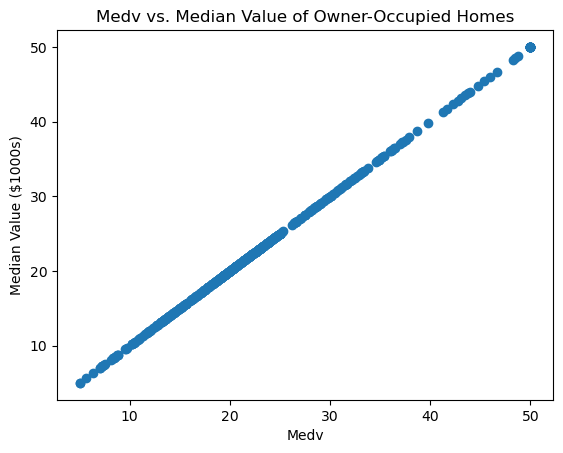

In [19]:
#let's visulize the dataset to understand clearly

continuous_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
for col in continuous_cols:
    plt.scatter(data[col], data['medv'])
    plt.title(col.capitalize() + ' vs. Median Value of Owner-Occupied Homes')
    plt.xlabel(col.capitalize())
    plt.ylabel('Median Value ($1000s)')
    plt.show()

**Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test=train_test_split(data,train_size=0.7,random_state=41)

In [24]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
58,0.15445,25.0,5.13,0,0.4530,6.145,29.2,7.8148,8,284,19.7,390.68,6.86,23.3
501,0.06263,0.0,11.93,0,0.5730,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4


In [25]:
X_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
299,0.05561,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358,14.8,371.58,4.74,29.0
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,393.37,5.03,31.1


**Scaling**

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
scale_cols=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']

In [29]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [30]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
64,0.000142,0.175,0.033724,0.0,0.050313,0.686096,0.569149,0.735962,0.086957,0.055344,0.638298,0.990771,0.174393,33.0
267,0.007743,0.200,0.128666,0.0,0.382046,0.917119,0.648936,0.117488,0.173913,0.146947,0.042553,0.968834,0.157561,50.0
225,0.007043,0.000,0.210411,0.0,0.233820,1.000000,0.819149,0.160482,0.304348,0.229008,0.510638,0.962429,0.080022,50.0
58,0.001977,0.250,0.171188,0.0,0.127349,0.500387,0.246809,0.607917,0.304348,0.185115,0.755319,0.984316,0.141556,23.3
501,0.000729,0.000,0.420455,0.0,0.377871,0.587142,0.671277,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,22.4


In [31]:
y_train=X_train.pop('medv')

In [32]:
y_train

64     33.0
267    50.0
225    50.0
58     23.3
501    22.4
       ... 
80     28.0
482    25.0
396    12.5
419     8.4
448    14.1
Name: medv, Length: 354, dtype: float64

**Let's import libraries for Multiple Linear Regression**

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [48]:
Lr_model=LinearRegression()

In [49]:
Lr_model.fit(X_train,y_train)

LinearRegression()

**RFE (Recursive Feature Elimination)**

In [50]:
#Prepare RFE
rfe = RFE(Lr_model, n_features_to_select=10)

In [51]:
#Train RFE
rfe = rfe.fit(X_train,y_train)

In [52]:
rfe.support_

array([False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [53]:
rfe.ranking_

array([2, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1])

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('crim', False, 2),
 ('zn', True, 1),
 ('indus', False, 4),
 ('chas', True, 1),
 ('nox', True, 1),
 ('rm', True, 1),
 ('age', False, 3),
 ('dis', True, 1),
 ('rad', True, 1),
 ('tax', True, 1),
 ('ptratio', True, 1),
 ('b', True, 1),
 ('lstat', True, 1)]

In [55]:
#Selected variables
X_train.columns[rfe.support_]

Index(['zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [56]:
#Important variables which we know
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [57]:
X_train_rfe

,zn,chas,nox,rm,dis,rad,tax,ptratio,b,lstat
64,0.175,0.0,0.050313,0.686096,0.735962,0.086957,0.055344,0.638298,0.990771,0.174393
267,0.200,0.0,0.382046,0.917119,0.117488,0.173913,0.146947,0.042553,0.968834,0.157561
225,0.000,0.0,0.233820,1.000000,0.160482,0.304348,0.229008,0.510638,0.962429,0.080022
58,0.250,0.0,0.127349,0.500387,0.607917,0.304348,0.185115,0.755319,0.984316,0.141556
501,0.000,0.0,0.377871,0.587142,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
...,...,...,...,...,...,...,...,...,...,...
80,0.250,0.0,0.070981,0.613091,0.388391,0.130435,0.179389,0.680851,1.000000,0.098234
482,0.000,0.0,0.292276,0.677769,0.207422,1.000000,0.914122,0.808511,0.995915,0.145695
396,0.000,0.0,0.628392,0.550736,0.049759,1.000000,0.914122,0.808511,1.000000,0.486755
419,0.000,0.0,0.680585,0.631875,0.060417,1.000000,0.914122,0.808511,0.121363,0.579746


**OLS Analysis**

In [58]:
X_train_rfemodel = X_train_rfe.copy()

In [59]:
X_train_rfemodel = sm.add_constant(X_train_rfemodel)

In [60]:
Lr_model= sm.OLS(y_train, X_train_rfemodel).fit()

In [61]:
print(Lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           5.01e-98
Time:                        17:31:52   Log-Likelihood:                -1064.5
No. Observations:                 354   AIC:                             2151.
Df Residuals:                     343   BIC:                             2194.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1804      2.961      8.843      0.0

**A p-value less than 0.05 represetns that the estimated coefficient is significantly different from zero at the 5% significance level, which means that there is strong evidence to reject the null hypothesis that the coefficient is zero. In other words, all the variables are statistically significant in explaining the variation in the response variable.**